In [1]:
import pandas as pd
import collections
import os
import pprint
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
network_profiles = ['PROFILE_CASCADE', 'PROFILE_INTRA_CASCADE', 'PROFILE_SPIKE', 'PROFILE_SLOW_JITTERS', 'PROFILE_FAST_JITTERS']
dynamic_profile_json = collections.defaultdict(list)
bola_profile_json = collections.defaultdict(list)
throughput_profile_json = collections.defaultdict(list)
dynamic_directory = './Dynamic'
bola_directory = './BOLA'
throughput_directory = './Throughput'

In [3]:
for filename in os.listdir(dynamic_directory):
    for p in network_profiles:
        if p in filename:
            dynamic_profile_json[p].append(dynamic_directory + '/' + filename)
for filename in os.listdir(bola_directory):
    for p in network_profiles:
        if p in filename:
            bola_profile_json[p].append(bola_directory + '/' + filename)
for filename in os.listdir(throughput_directory):
    for p in network_profiles:
        if p in filename:
            throughput_profile_json[p].append(throughput_directory + '/' + filename)

In [4]:
pprint.pprint(throughput_profile_json)

defaultdict(<class 'list'>,
            {'PROFILE_CASCADE': ['./Throughput/run-PROFILE_CASCADE-2020-12-01T17:27:57.024Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:17:19.162Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:24:44.068Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:11:37.315Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:21:45.219Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T16:51:06.752Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:08:13.759Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T16:26:51.605Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:36:59.464Z.json',
                                 './Throughput/run-PROFILE_CASCADE-2020-12-01T17:

In [5]:
profile_df = collections.defaultdict(pd.DataFrame)

In [6]:
def df_from_jsons(json_list):
    read_jsons = []
    for filename in json_list:
        read_jsons.append(pd.read_json(filename, typ='series'))
    return pd.DataFrame(read_jsons)

In [7]:
for p in network_profiles:
    dynamic_df = df_from_jsons(dynamic_profile_json[p])
    dynamic_df['abrAlgorithm'] = 'Dynamic'
    bola_df = df_from_jsons(bola_profile_json[p])
    bola_df['abrAlgorithm'] = 'BOLA'
    throughput_df = df_from_jsons(throughput_profile_json[p])
    throughput_df['abrAlgorithm'] = 'Throughput'
    profile_df[p] = pd.concat([dynamic_df, bola_df, throughput_df], ignore_index=True)
profile_df['PROFILE_FAST_JITTERS']
    

,stallDuration,averageLatency,averageBufferLength,averageBitrate,numSwitches,abrAlgorithm
0,0.000,0.962638,0.856276,1000000.000000,1.0,Dynamic
1,0.000,0.955293,0.874879,1000000.000000,1.0,Dynamic
2,0.000,0.953466,0.892138,1000000.000000,1.0,Dynamic
3,0.000,0.954466,0.893603,1000000.000000,1.0,Dynamic
4,0.000,0.958397,0.876845,1000000.000000,1.0,Dynamic
5,1260.635,1.040241,0.655776,599982.868783,3.0,Dynamic
6,0.000,0.962259,0.879862,1000000.000000,1.0,Dynamic
7,0.000,0.953776,0.868690,1000000.000000,1.0,Dynamic
8,833.525,1.045707,0.573759,437882.860048,3.0,Dynamic
9,0.000,0.961966,0.889052,1000000.000000,1.0,Dynamic


In [148]:
def compareBoxplots(profile, metric):
    fig = plt.figure(figsize=(2,4))
    sns.set(font_scale = 0.5)
    sns.boxplot(x=profile_df[profile]["abrAlgorithm"], y=profile_df[profile][metric], palette="Blues", width=0.2).set_title(f'{profile}', fontsize=5)
    # figure.savefig(f"./plots/{profile}_{metric}.png")

In [188]:
def plot_cdf(profile, metric):
    df = profile_df[profile]
    dynamic_df = df[df['abrAlgorithm'] == 'Dynamic']
    bola_df = df[df['abrAlgorithm'] == 'BOLA']
    throughput_df = df[df['abrAlgorithm'] == 'Throughput']

    fig = plt.figure(figsize=(5,3))
    sns.set_style("whitegrid")
    kwargs = {'cumulative': True}
    f = sns.distplot(dynamic_df[metric], hist=False, hist_kws={'cumulative': True, 'density': True}, kde_kws=kwargs, label='Dynamic')
    f = sns.distplot(bola_df[metric], hist=False, hist_kws={'cumulative': True, 'density': True}, kde_kws=kwargs, label='BOLA')
    f = sns.distplot(throughput_df[metric], hist=False, hist_kws={'cumulative': True, 'density': True}, kde_kws=kwargs, label='Throughput')
    f.set_title(f'{profile}')

In [150]:
'''
PROFILE_CASCADE
'''

'\nPROFILE_CASCADE\n'

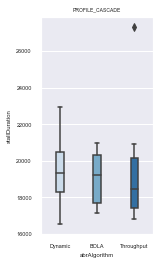

In [151]:
compareBoxplots(profile="PROFILE_CASCADE", metric="stallDuration")

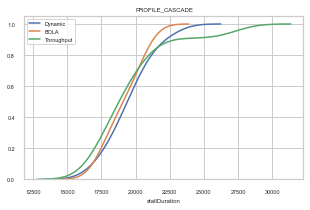

In [189]:
plot_cdf(profile="PROFILE_CASCADE", metric="stallDuration")

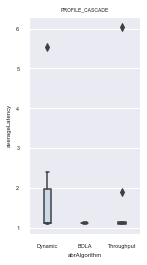

In [152]:
compareBoxplots(profile="PROFILE_CASCADE", metric="averageLatency")

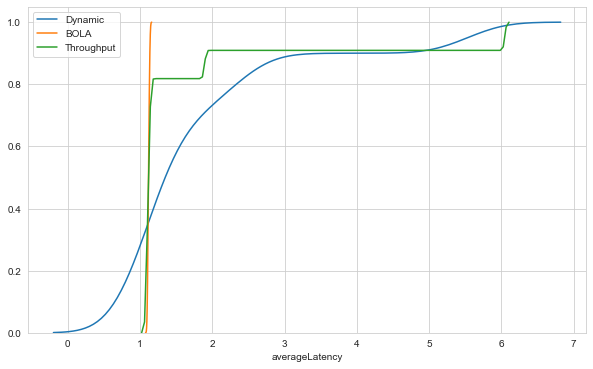

In [86]:
plot_cdf(profile="PROFILE_CASCADE", metric="averageLatency")

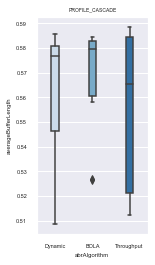

In [153]:
compareBoxplots(profile="PROFILE_CASCADE", metric="averageBufferLength")

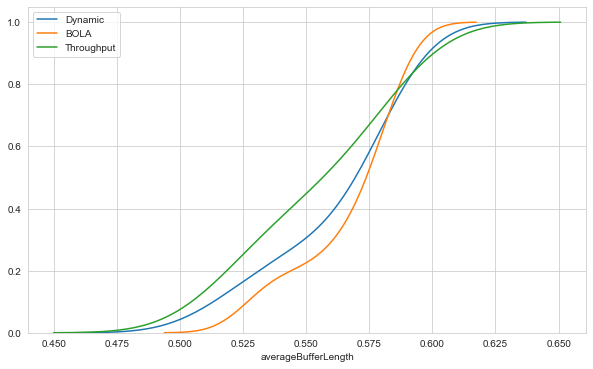

In [88]:
plot_cdf(profile="PROFILE_CASCADE", metric="averageBufferLength")

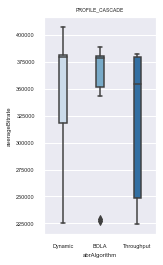

In [154]:
compareBoxplots(profile="PROFILE_CASCADE", metric="averageBitrate")

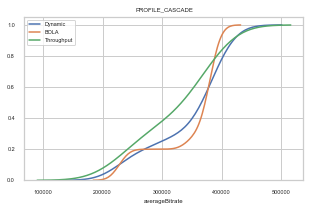

In [190]:
plot_cdf(profile="PROFILE_CASCADE", metric="averageBitrate")

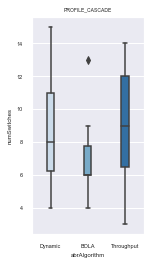

In [155]:
compareBoxplots(profile="PROFILE_CASCADE", metric="numSwitches")

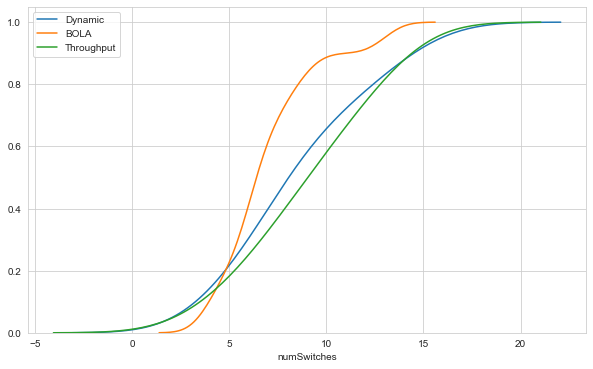

In [92]:
plot_cdf(profile="PROFILE_CASCADE", metric="numSwitches")

In [93]:
'''
PROFILE_INTRA_CASCADE
'''

'\nPROFILE_INTRA_CASCADE\n'

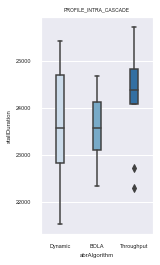

In [156]:
compareBoxplots(profile="PROFILE_INTRA_CASCADE", metric="stallDuration")

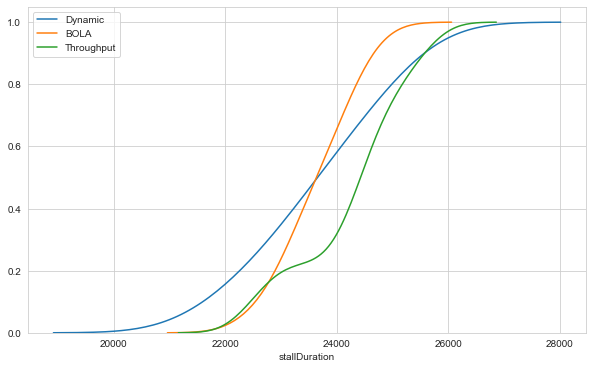

In [95]:
plot_cdf(profile="PROFILE_INTRA_CASCADE", metric="stallDuration")

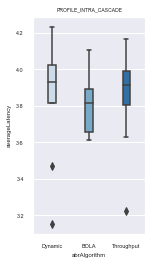

In [158]:
compareBoxplots(profile="PROFILE_INTRA_CASCADE", metric="averageLatency")

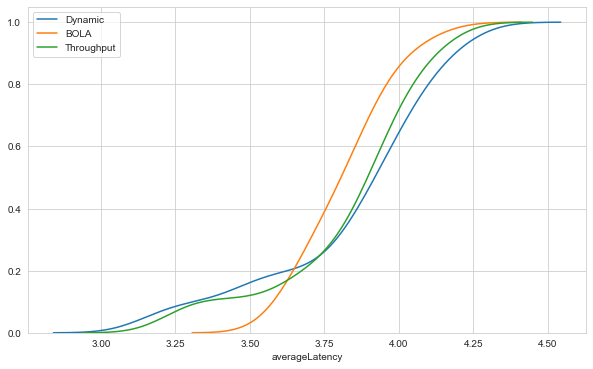

In [97]:
plot_cdf(profile="PROFILE_INTRA_CASCADE", metric="averageLatency")

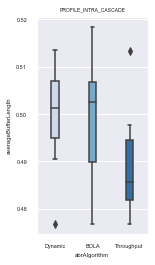

In [159]:
compareBoxplots(profile="PROFILE_INTRA_CASCADE", metric="averageBufferLength")

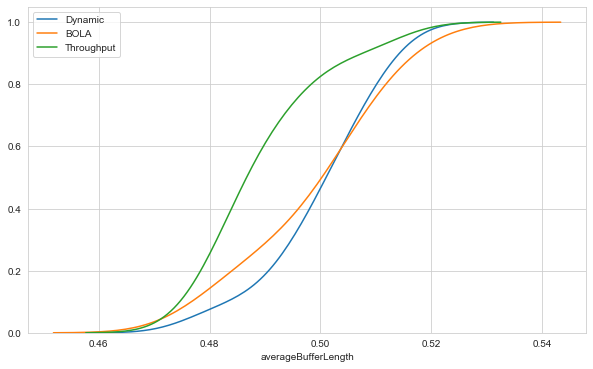

In [99]:
plot_cdf(profile="PROFILE_INTRA_CASCADE", metric="averageBufferLength")

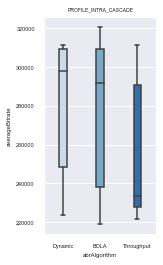

In [161]:
compareBoxplots(profile="PROFILE_INTRA_CASCADE", metric="averageBitrate")

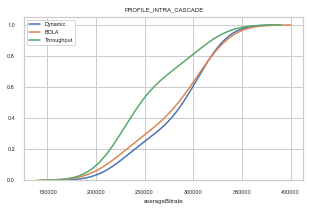

In [191]:
plot_cdf(profile="PROFILE_INTRA_CASCADE", metric="averageBitrate")

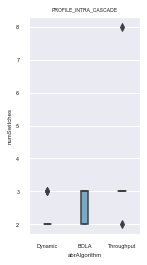

In [162]:
compareBoxplots(profile="PROFILE_INTRA_CASCADE", metric="numSwitches")

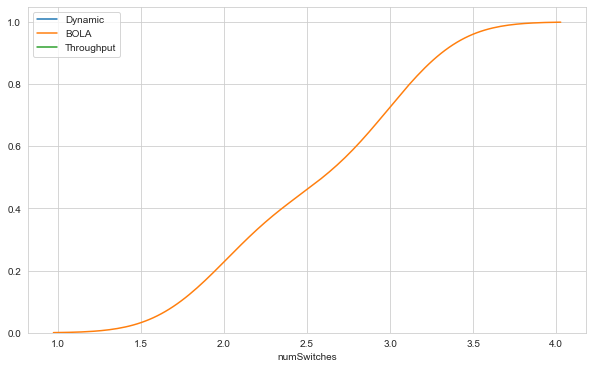

In [103]:
plot_cdf(profile="PROFILE_INTRA_CASCADE", metric="numSwitches")

In [104]:
'''
PROFILE_SPIKE
'''

'\nPROFILE_SPIKE\n'

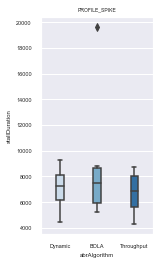

In [163]:
compareBoxplots(profile="PROFILE_SPIKE", metric="stallDuration")

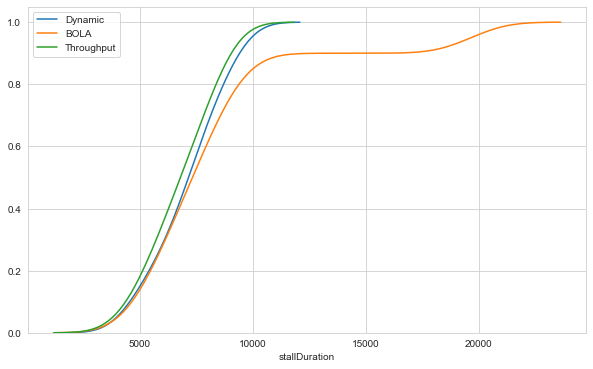

In [106]:
plot_cdf(profile="PROFILE_SPIKE", metric="stallDuration")

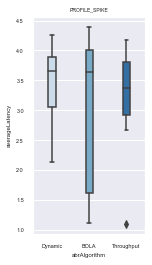

In [164]:
compareBoxplots(profile="PROFILE_SPIKE", metric="averageLatency")

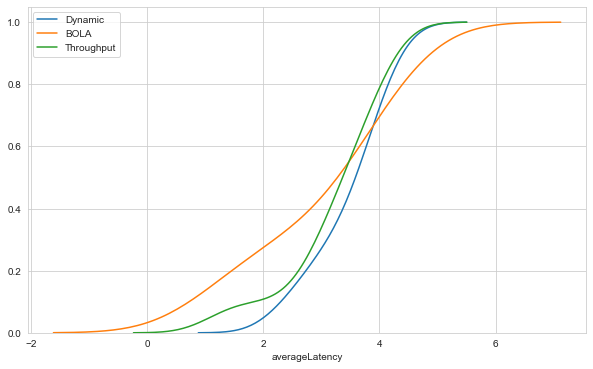

In [108]:
plot_cdf(profile="PROFILE_SPIKE", metric="averageLatency")

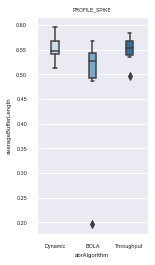

In [165]:
compareBoxplots(profile="PROFILE_SPIKE", metric="averageBufferLength")

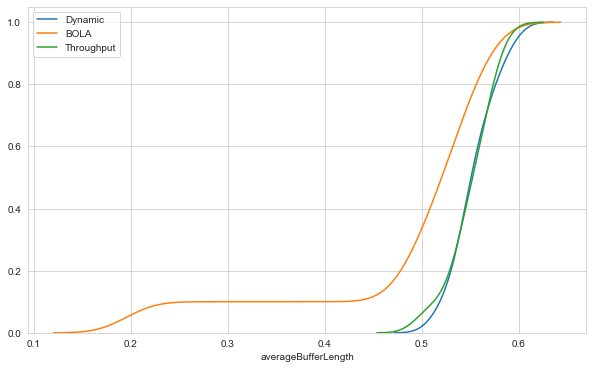

In [110]:
plot_cdf(profile="PROFILE_SPIKE", metric="averageBufferLength")

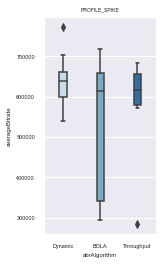

In [166]:
compareBoxplots(profile="PROFILE_SPIKE", metric="averageBitrate")

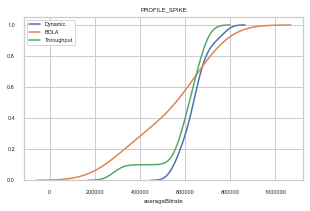

In [192]:
plot_cdf(profile="PROFILE_SPIKE", metric="averageBitrate")

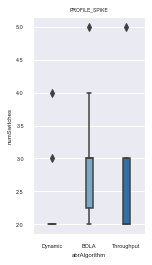

In [167]:
compareBoxplots(profile="PROFILE_SPIKE", metric="numSwitches")

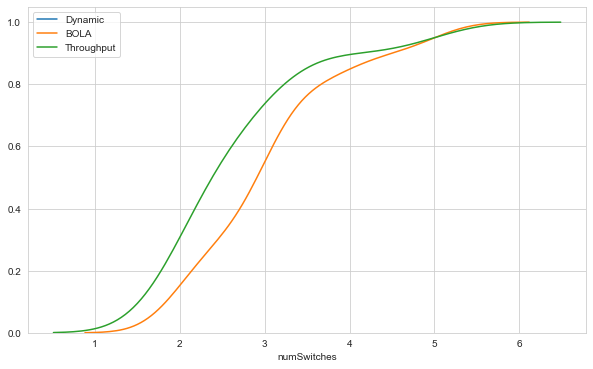

In [114]:
plot_cdf(profile="PROFILE_SPIKE", metric="numSwitches")

In [115]:
'''
PROFILE_SLOW_JITTERS
'''

'\nPROFILE_SLOW_JITTERS\n'

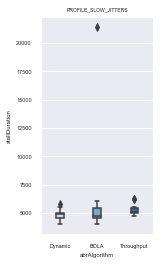

In [168]:
compareBoxplots(profile="PROFILE_SLOW_JITTERS", metric="stallDuration")

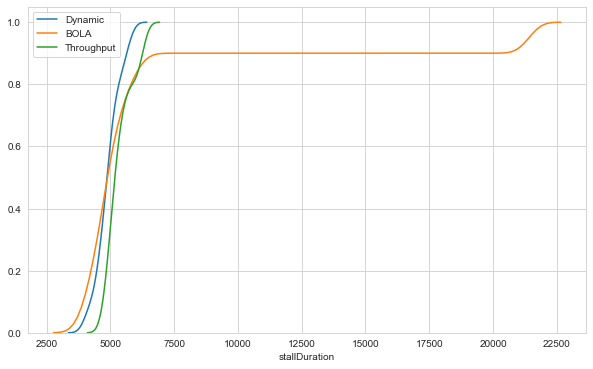

In [117]:
plot_cdf(profile="PROFILE_SLOW_JITTERS", metric="stallDuration")

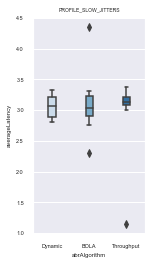

In [169]:
compareBoxplots(profile="PROFILE_SLOW_JITTERS", metric="averageLatency")

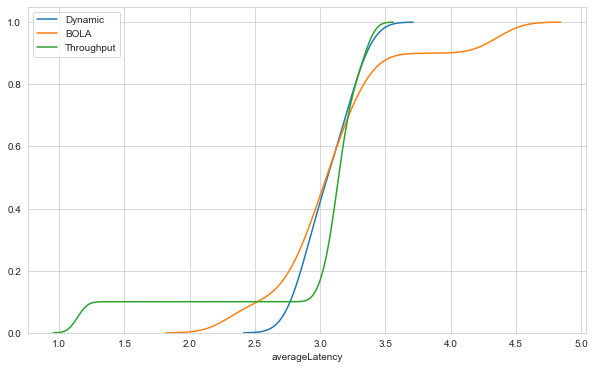

In [119]:
plot_cdf(profile="PROFILE_SLOW_JITTERS", metric="averageLatency")

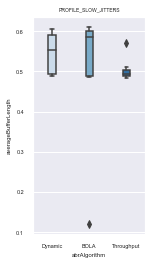

In [170]:
compareBoxplots(profile="PROFILE_SLOW_JITTERS", metric="averageBufferLength")

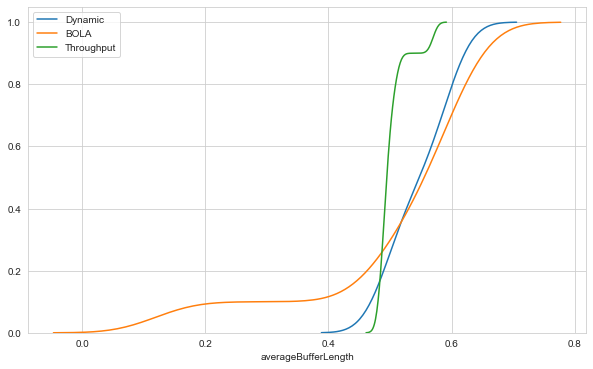

In [121]:
plot_cdf(profile="PROFILE_SLOW_JITTERS", metric="averageBufferLength")

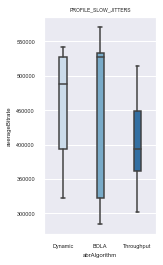

In [172]:
compareBoxplots(profile="PROFILE_SLOW_JITTERS", metric="averageBitrate")

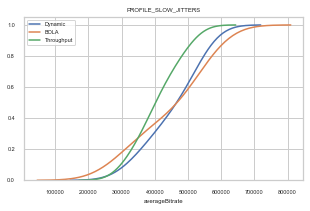

In [193]:
plot_cdf(profile="PROFILE_SLOW_JITTERS", metric="averageBitrate")

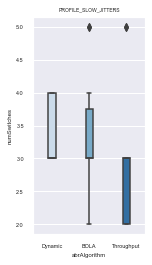

In [173]:
compareBoxplots(profile="PROFILE_SLOW_JITTERS", metric="numSwitches")

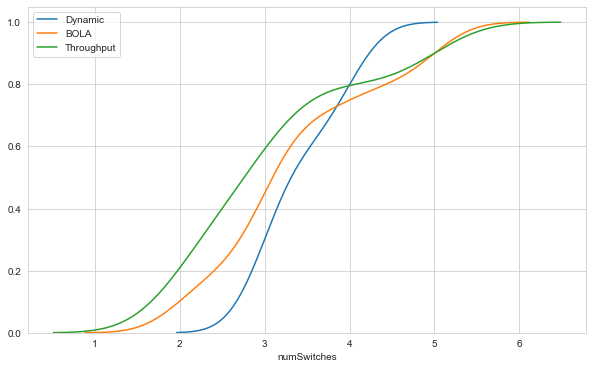

In [125]:
plot_cdf(profile="PROFILE_SLOW_JITTERS", metric="numSwitches")

In [126]:
'''
PROFILE_FAST_JITTERS
'''

'\nPROFILE_FAST_JITTERS\n'

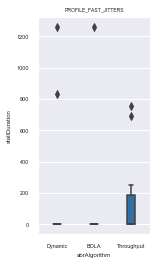

In [174]:
compareBoxplots(profile="PROFILE_FAST_JITTERS", metric="stallDuration")

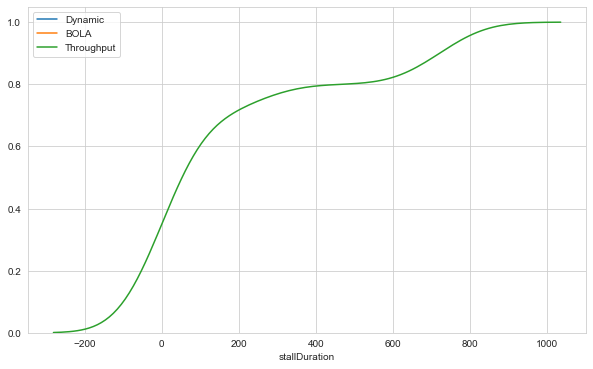

In [128]:
plot_cdf(profile="PROFILE_FAST_JITTERS", metric="stallDuration")

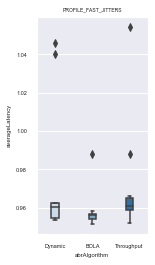

In [175]:
compareBoxplots(profile="PROFILE_FAST_JITTERS", metric="averageLatency")

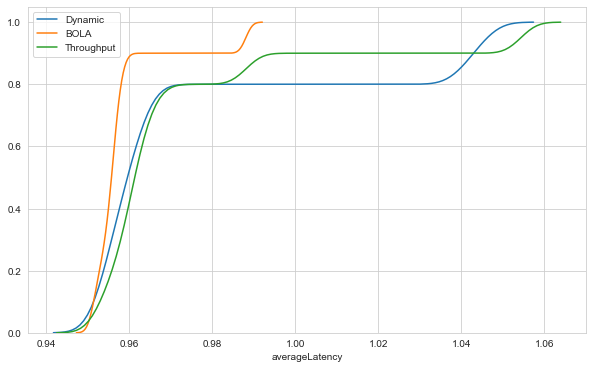

In [130]:
plot_cdf(profile="PROFILE_FAST_JITTERS", metric="averageLatency")

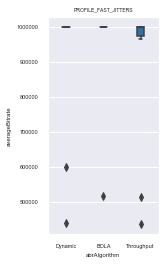

In [176]:
compareBoxplots(profile="PROFILE_FAST_JITTERS", metric="averageBitrate")

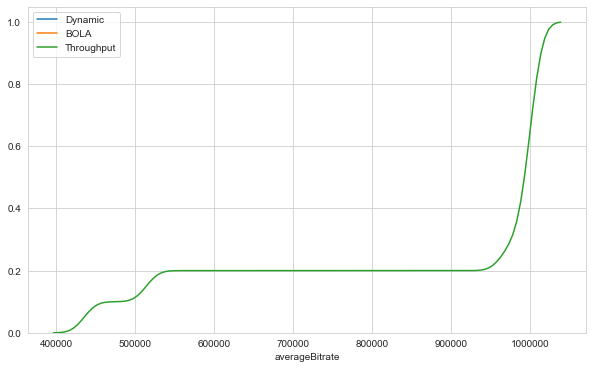

In [132]:
plot_cdf(profile="PROFILE_FAST_JITTERS", metric="averageBitrate")

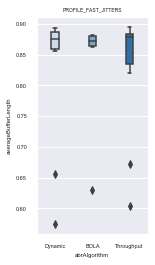

In [177]:
compareBoxplots(profile="PROFILE_FAST_JITTERS", metric="averageBufferLength")

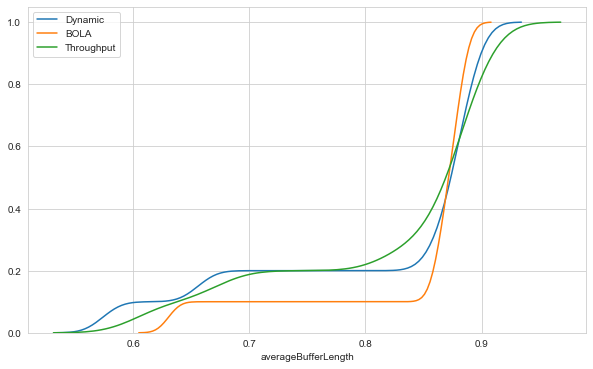

In [134]:
plot_cdf(profile="PROFILE_FAST_JITTERS", metric="averageBufferLength")

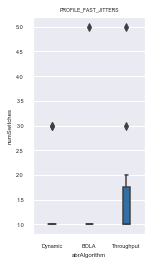

In [178]:
compareBoxplots(profile="PROFILE_FAST_JITTERS", metric="numSwitches")

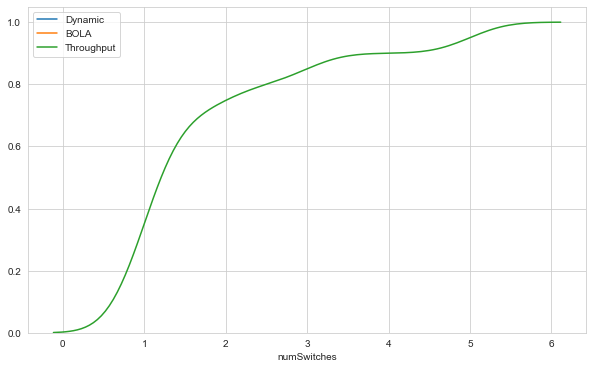

In [136]:
plot_cdf(profile="PROFILE_FAST_JITTERS", metric="numSwitches")